<a href="https://colab.research.google.com/github/mahima-c/DL-Problem-solution/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Using CNN**






https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [9]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [11]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 89% 59.0M/66.0M [00:00<00:00, 85.0MB/s]
100% 66.0M/66.0M [00:00<00:00, 90.1MB/s]


In [16]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [17]:
!ls

creditcard.csv	kaggle.json


In [82]:
data=pd.read_csv("creditcard.csv")

In [83]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
data.shape

(284807, 31)

In [66]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Imbalnce dataset

In [84]:
# first Balance Dataset
non_fraud=data[data["Class"]==0]
fraud=data[data["Class"]==1]

In [85]:
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [86]:
non_fraud=non_fraud.sample(fraud.shape[0])

In [72]:
non_fraud.shape

(492, 31)

In [87]:
data=fraud.append(non_fraud,ignore_index=True)

In [74]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [88]:
x=data.drop('Class',axis=1)
y=data["Class"]

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [90]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [91]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [79]:
X_train.shape#MODEL TAKES 3D DATA

(787, 30)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


# **Build CNN**

In [ ]:
epoch=20
model=Sequential()

model.add(Conv1D(32,2,activation="relu",input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))


In [93]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [99]:
model.compile(optimizer=Adam(lr=0.0001),loss="binary_crossentropy",metrics=['accuracy'])

In [100]:
history=model.fit(X_train,y_train,epochs=epoch,validation_data=(X_test,y_test),verbose=1)#verbose =1 print the training process

Epoch 1/20
25/25 [==============================] - 2s 21ms/step - loss: 0.9551 - accuracy: 0.5364 - val_loss: 0.6239 - val_accuracy: 0.8528
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.4490 - accuracy: 0.8103 - val_loss: 0.5737 - val_accuracy: 0.8934
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3888 - accuracy: 0.8572 - val_loss: 0.5381 - val_accuracy: 0.9086
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.3892 - accuracy: 0.8823 - val_loss: 0.5028 - val_accuracy: 0.9137
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.3361 - accuracy: 0.8502 - val_loss: 0.4606 - val_accuracy: 0.9188
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.2939 - accuracy: 0.8949 - val_loss: 0.4226 - val_accuracy: 0.9289
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3088 - accuracy: 0.8855 - val_loss: 0.3876 - val_accuracy: 0.9289
Epoch 8/20
25

In [101]:
def plot_learningCurve(history,epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

  #for loss graph
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

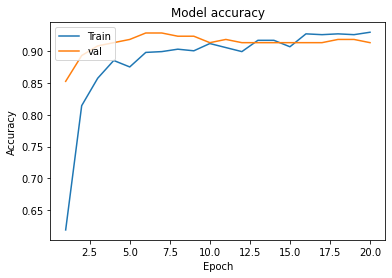

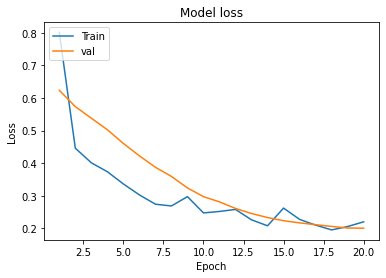

In [102]:
plot_learningCurve(history,epoch)

Epoch 1/50
25/25 [==============================] - 1s 18ms/step - loss: 1.1140 - accuracy: 0.5521 - val_loss: 0.6687 - val_accuracy: 0.6751
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.7717 - accuracy: 0.6533 - val_loss: 0.6402 - val_accuracy: 0.7360
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.7021 - val_loss: 0.6153 - val_accuracy: 0.7157
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5729 - accuracy: 0.7373 - val_loss: 0.5907 - val_accuracy: 0.7259
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5788 - accuracy: 0.7272 - val_loss: 0.5627 - val_accuracy: 0.7310
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.4989 - accuracy: 0.7957 - val_loss: 0.5338 - val_accuracy: 0.7360
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.4450 - accuracy: 0.8127 - val_loss: 0.5041 - val_accuracy: 0.7665
Epoch 8/50
25/25 [=

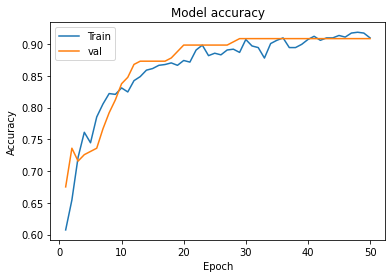

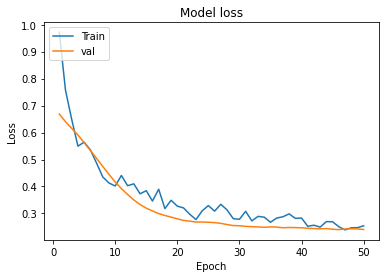

In [107]:
epoch=50
model=Sequential()

model.add(Conv1D(32,2,activation="relu",input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer=Adam(lr=0.0001),loss="binary_crossentropy",metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=epoch,validation_data=(X_test,y_test),verbose=1)
plot_learningCurve(history,epoch)